# Importing the Data Set

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd

df = pd.read_csv('Restaurant_Reviews.tsv',delimiter='\t', quoting=3)
print(df)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


# Creating Bag of Words model

In [2]:
#Importing the libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')

#Creating Corpus
corpus = [] # to collect all the refined reviews
remove_set = ['not', 'is','but', 'no', 'didn', 'doesn', 'won', 'she', 'wasn'] #to remove the words from stopwords

#Getting all stop words
all_stopwords = stopwords.words('english')

#Removing required words from stopwords
for necessary_word in remove_set:
    all_stopwords.remove(necessary_word)

for i in range(0,1000):
    review = re.sub('[^a-zA-Z]', ' ',df['Review'][i]) # substituing all the none characters by space
    review = review.lower() # converting all the revies in to lower case
    review = review.split() # converting the senetence into a list of words
    #Stemming variables
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    # to convert the list of words into sentence we use the join function
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sharath\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#Bag of words
cv = CountVectorizer(max_features=None)
x = cv.fit_transform(corpus).toarray()
y = df.iloc[:,-1].values

# SVM with PCA

In [4]:
#Implementing PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=600)
x = pca.fit_transform(x)
np.set_printoptions(suppress=True)

0.92


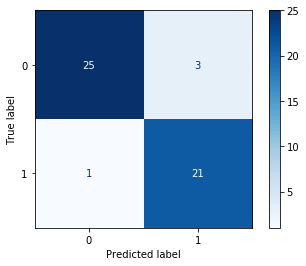

In [5]:
#splitting the data into training set and test set
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.05,random_state=0)

#creating the SVM model
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state=0)

#fitting the model
classifier.fit(x_tr,y_tr)

#predicting the output
y_pred = classifier.predict(x_te)

#calculating the accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
acc = accuracy_score(y_te,y_pred)
print(acc)

#Confusion Matrix
plot_confusion_matrix(estimator=classifier, X=x_te, y_true=y_te, cmap='Blues')

# Classification Output

In [6]:
from sklearn.metrics import classification_report
print(classification_report(y_te,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93        28
           1       0.88      0.95      0.91        22

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50

